In [22]:
from osgeo import gdal
import os
from matplotlib import pyplot as plt
import numpy as np

In [23]:
band_1_dir = os.chdir(r'D:\Data for Process\Data\Liss3python\Band_1')

In [24]:
sub_scenes = ['a.tif','b.tif','c.tif','d.tif','e.tif','f.tif','g.tif','h.tif','i.tif']

In [25]:
list = []
for i in sub_scenes:
    k=gdal.Open(i)
    l=k.ReadAsArray()
    list.append(l)

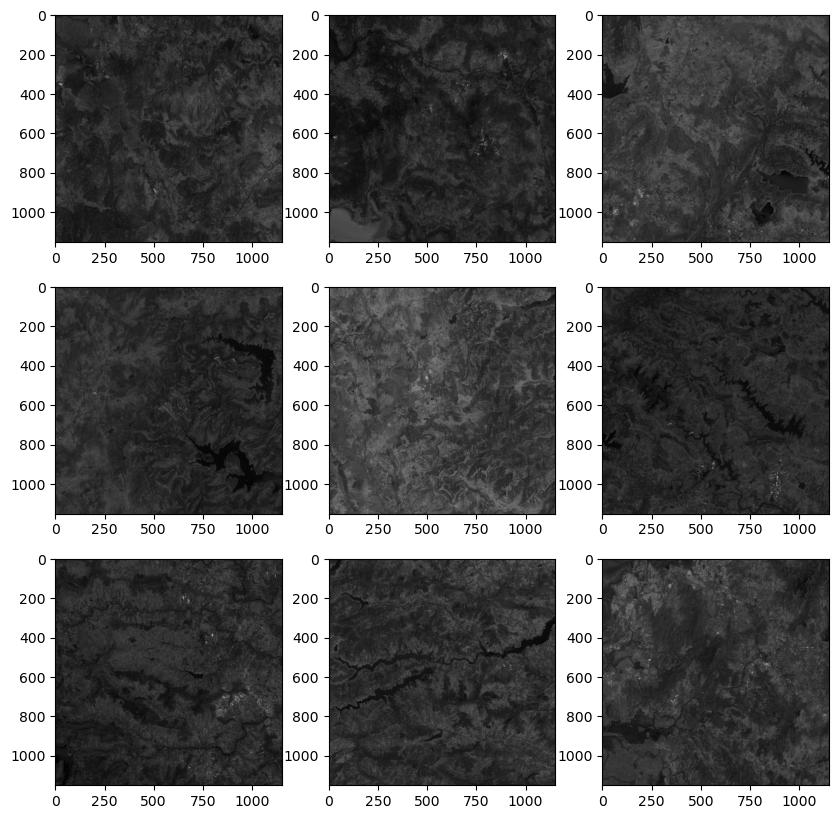

In [26]:
plt.figure(figsize=(10,10))
for i in range (1,10):
    plt.subplot(3,3,i)
    plt.imshow(list[i-9], cmap='gray')

In [27]:
projection = k.GetProjection()
projection

'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'

In [28]:
mosaic_band_1 = gdal.Warp('mosaiced_band_1.tif', sub_scenes, format='GTiff')

In [29]:
oo=gdal.Open('mosaiced_band_1.tif')

In [30]:
pp=oo.ReadAsArray()

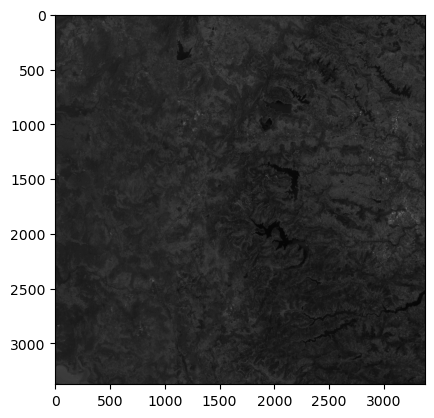

In [31]:
plt.imshow(pp, cmap='gray')

MOSAIC BY ANOTHER METHOD

In [32]:
def calculate_extents(sub_scenes):
    trf = sub_scenes.GetGeoTransform()
    left = trf[0]
    right = trf[0]+trf[1]*sub_scenes.RasterXSize
    top = trf[3]
    bottom = trf[3]+trf[5]*sub_scenes.RasterYSize
    return (left, right, bottom, top)

In [33]:
Extents = []
for i in sub_scenes:
    data = gdal.Open(i)
    extent = calculate_extents(data)
    Extents.append(extent)

In [34]:
Extents

[(72.9955, 73.2545, 18.7455, 19.0045),
 (72.9955, 73.2545, 18.4955, 18.7545),
 (72.9955, 73.2545, 18.2455, 18.5045),
 (73.2455, 73.5045, 18.7455, 19.0045),
 (73.2455, 73.5045, 18.4955, 18.7545),
 (73.2455, 73.5045, 18.2455, 18.5045),
 (73.4955, 73.7545, 18.7455, 19.0045),
 (73.4955, 73.7545, 18.4955, 18.7545),
 (73.4955, 73.7545, 18.2455, 18.5045)]

In [35]:
Extents = np.array(Extents)
Extents

array([[72.9955, 73.2545, 18.7455, 19.0045],
       [72.9955, 73.2545, 18.4955, 18.7545],
       [72.9955, 73.2545, 18.2455, 18.5045],
       [73.2455, 73.5045, 18.7455, 19.0045],
       [73.2455, 73.5045, 18.4955, 18.7545],
       [73.2455, 73.5045, 18.2455, 18.5045],
       [73.4955, 73.7545, 18.7455, 19.0045],
       [73.4955, 73.7545, 18.4955, 18.7545],
       [73.4955, 73.7545, 18.2455, 18.5045]])

In [36]:
mosaic_left = np.min(Extents[:,0:2])
mosaic_right = np.max(Extents[:,0:2])
mosaic_top = np.max(Extents[:,2:])
mosaic_bottom = np.min(Extents[:,2:])

In [37]:
print(mosaic_left, mosaic_right, mosaic_top, mosaic_bottom)

72.9955 73.7545 19.0045 18.2455


In [38]:
import geopandas as gpd

In [47]:
a='a.tif'
c=gdal.Open(a)
b=c.ReadAsArray()
c.GetGeoTransform()

(72.9955, 0.00022502172024325468, 0.0, 19.0045, 0.0, -0.00022502172024326702)

In [44]:
b

array([[ 98,  98,  97, ...,  94,  90,  91],
       [100,  99,  99, ...,  93,  92,  95],
       [100, 100,  99, ...,  93,  93,  94],
       ...,
       [101, 103, 106, ..., 102, 103, 109],
       [111, 103, 107, ..., 104, 107, 109],
       [114, 106, 105, ..., 106, 107, 106]], dtype=uint16)

In [51]:
c.RasterXSize, c.RasterYSize

(1151, 1151)